**apply missing category imputation when :

1. Not missing completely at random
2. when missing values are greater than 5%

in this all the NA values are converted to the word 'Missing' and a completely new category named 'Missing' is created

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.sample(4)

,FireplaceQu,GarageQual,SalePrice
1224,Gd,TA,184000
985,NaN,TA,125000
267,Gd,TA,179500
1074,NaN,TA,194000


In [5]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


**good results will be derived on applying it to FireplaceQu column, since there are nearly 50% missing values**

Text(0, 0.5, 'Number of houses')

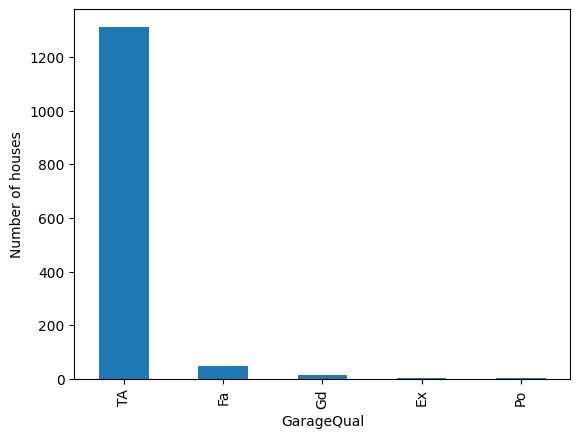

In [7]:
df['GarageQual'].value_counts().plot(kind='bar')
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [8]:
df['GarageQual'].fillna('Missing',inplace=True)

/tmp/ipython-input-3265589431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('Missing',inplace=True)


In [9]:
df['GarageQual'].value_counts()

,count
GarageQual,
TA,1311
Missing,81
Fa,48
Gd,14
Ex,3
Po,3


Text(0.5, 1.0, 'After missing category imputation')

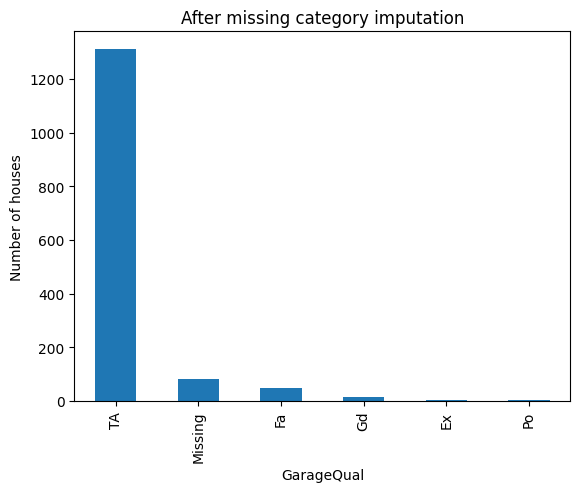

In [11]:
df['GarageQual'].value_counts().plot(kind='bar')
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')
plt.title('After missing category imputation')

Text(0.5, 1.0, 'Before missing category imputation')

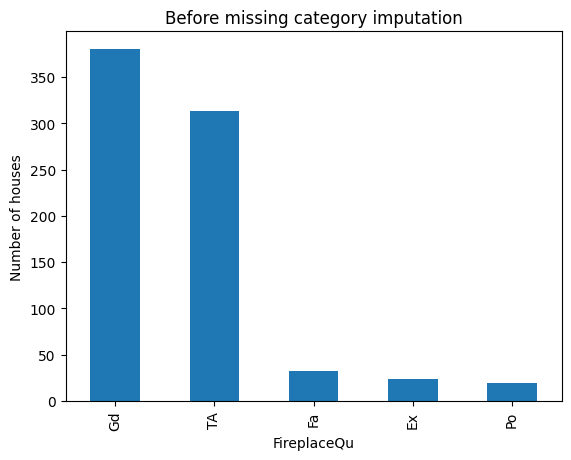

In [12]:
df['FireplaceQu'].value_counts().plot(kind='bar')
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')
plt.title('Before missing category imputation')

In [13]:

df['FireplaceQu'].fillna('Missing',inplace=True)

Text(0.5, 1.0, 'After missing category imputation')

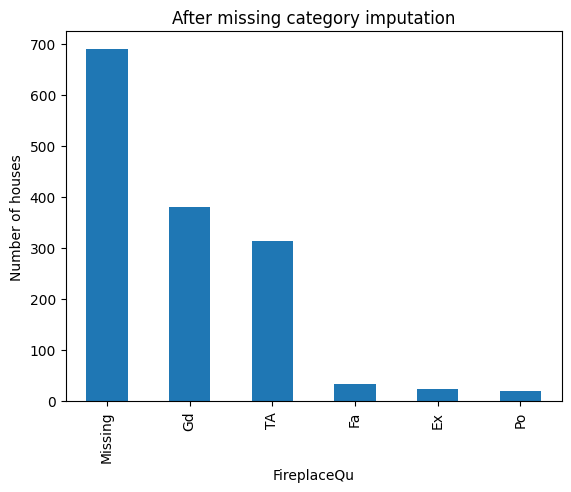

In [14]:
df['FireplaceQu'].value_counts().plot(kind='bar')
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')
plt.title('After missing category imputation')

**using sklearn**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']


In [19]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=2
)

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [21]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [22]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

**all the missing values in the input columns have now been imputed with the word 'Missing'**